# Here will import all of the major Machine Learning Model and run them with same sets of data to see which performs the best and also we will evalute them 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
heart= pd.read_csv("heart-disease.csv")
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
x=heart.drop("target",axis=1)
y=heart["target"]

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [5]:
#importing all models

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [6]:
models={"LinearSVC":LinearSVC(),
       "KNeighboursClassifer":KNeighborsClassifier(),
       "SVC":SVC(),
       "LogisticRegression":LogisticRegression(),
       "RandomForestClassifer":RandomForestClassifier()}

results={}


In [7]:
np.random.seed(42)

for model_name ,model in models.items():
    model.fit(x_train,y_train)
    results[model_name]=model.score(x_test,y_test)
    
results


C:\Users\preay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\preay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.5901639344262295,
 'KNeighboursClassifer': 0.5901639344262295,
 'SVC': 0.6065573770491803,
 'LogisticRegression': 0.819672131147541,
 'RandomForestClassifer': 0.819672131147541}

<AxesSubplot:>

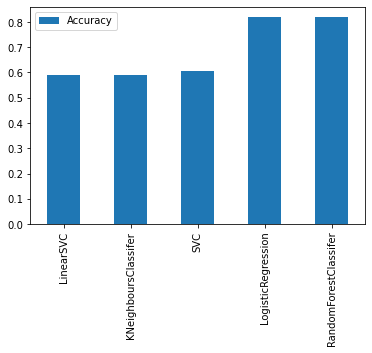

In [8]:
result_df=pd.DataFrame(results.values(),results.keys(),columns=["Accuracy"])
result_df.plot.bar()

so we can see on given dataset LogisticRegression performance the best 

now lets see we can improve it more

In [9]:
np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
rs_log_Reg= RandomizedSearchCV( estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                n_iter=5,
                               verbose=True)
rs_log_Reg.fit(x_train,y_train)
rs_log_Reg.score(x_test,y_test)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


0.8032786885245902

In [10]:
rs_log_Reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [11]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,plot_roc_curve

In [12]:
y_preds = rs_log_Reg.predict(x_test)
y_preds

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [13]:
confusion_matrix(y_test,y_preds)


array([[25, 10],
       [ 2, 24]], dtype=int64)

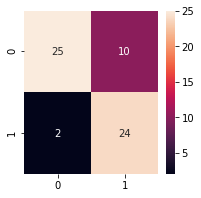

In [14]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(3,3))
ax= sns.heatmap(confusion_matrix(y_test,y_preds),
               annot=True)

In [21]:
classification_report(y_test,y_preds)

'              precision    recall  f1-score   support\n\n           0       0.93      0.71      0.81        35\n           1       0.71      0.92      0.80        26\n\n    accuracy                           0.80        61\n   macro avg       0.82      0.82      0.80        61\nweighted avg       0.83      0.80      0.80        61\n'

In [15]:
precision_score(y_test,y_preds)

0.7058823529411765

In [16]:
recall_score(y_test,y_preds)


0.9230769230769231

In [17]:
f1_score(y_test,y_preds)

0.8000000000000002

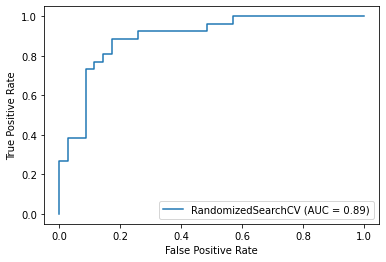

In [20]:
plot_roc_curve(rs_log_Reg,x_test,y_test)

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(rs_log_Reg,x_test,y_test,scoring="accuracy")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


array([0.61538462, 0.91666667, 0.75      , 0.83333333, 0.91666667])

In [25]:
mean_cros_score=np.mean(cross_val_score(rs_log_Reg,x_test,y_test,scoring="accuracy"))
mean_cros_score


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


0.8076923076923077

# This show for our given dataset testing all models and tuning them, the best possible score we can get is 80%
